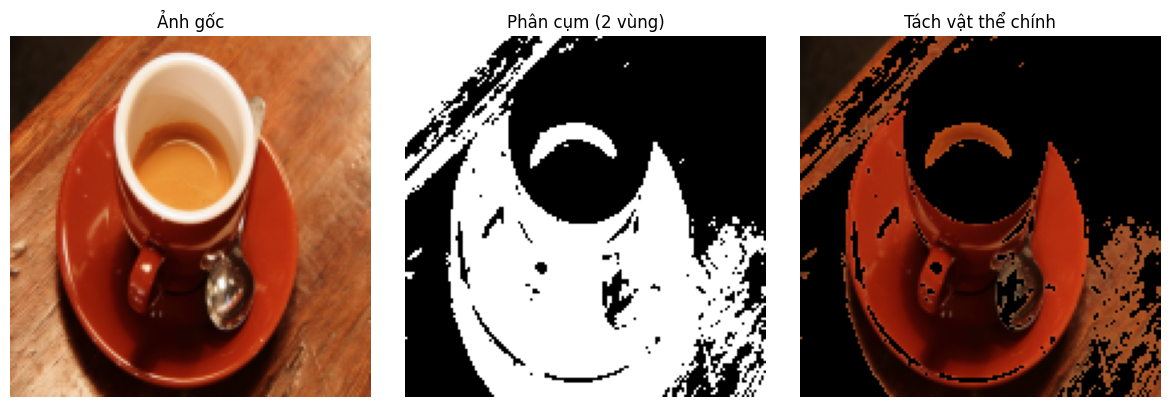

In [4]:
# --- 1️⃣ Import thư viện ---
from sklearn.cluster import KMeans
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# --- 2️⃣ Tải ảnh mẫu ---
# Dùng ảnh có sẵn trong thư viện skimage
img = data.coffee()  # bạn có thể đổi: data.chelsea() (mèo), data.astronaut()
img = resize(img, (150, 150))  # resize nhỏ để xử lý nhanh

# --- 3️⃣ Tiền xử lý ---
pixels = img.reshape(-1, 3)  # chuyển ảnh thành (N,3) -> mỗi pixel là 1 điểm RGB

# --- 4️⃣ Áp dụng K-Means ---
k = 2  # chia ảnh thành 2 cụm: nền và vật thể
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)
segmented_img = labels.reshape(img.shape[:2])  # chuyển nhãn về dạng ảnh

# --- 5️⃣ Hiển thị kết quả ---
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(img)
ax[0].set_title("Ảnh gốc")

ax[1].imshow(segmented_img, cmap="gray")
ax[1].set_title("Phân cụm (2 vùng)")

# Đánh dấu vùng chính (vật thể có nhiều pixel hơn)
mask = segmented_img == np.argmax(np.bincount(labels))
object_only = img * mask[..., np.newaxis]
ax[2].imshow(object_only)
ax[2].set_title("Tách vật thể chính")

for a in ax: a.axis("off")
plt.tight_layout()
plt.show()
